# softmax回归、SVM分类、感知器分类以及ＢＰ神经网络分类

<p>姓名：杨云森</p>
<p>专业：应用统计</p>
<p>学号：20460126007</p>

## 数据集(手写数字识别)

# Softmax多分类回归

In [3]:
import numpy as np
import os

class Softmax:
    def loadData(self, dir):#给出文件目录，读取数据
        digits = list() #数据集（数据）
        labels = list() #标签
        if os.path.exists(dir): #判断目录是否存在
            files = os.listdir(dir) #获取目录下的所有文件名
            for file in files:  #遍历所有文件
                labels.append(file.split('_')[0])   #按照文件名规则，文件名第一位是标签
                with open(dir + '\\' + file) as f:  #通过“目录+文件名”，获取文件内容
                    digit = list()
                    for line in f:  #遍历文件每一行
                        digit.extend(map(int, list(line.replace('\n', ''))))    #遍历每行时，把数字通过extend的方法扩展
                    digits.append(digit)    #将数据扩展进去
        digits = np.array(digits)   #数据集
        labels = list(map(int, labels)) #标签
        labels = np.array(labels).reshape((-1, 1))  #将标签重构成(N, 1)的大小
        return digits, labels

    def softmax(self, X):   #softmax函数
        return np.exp(X) / np.sum(np.exp(X))

    def train(self, digits, labels, maxIter = 100, alpha = 0.1):
        self.weights = np.random.uniform(0, 1, (10, 1024))
        for iter in range(maxIter):
            for i in range(len(digits)):
                x = digits[i].reshape(-1, 1)
                y = np.zeros((10, 1))
                y[labels[i]] = 1
                y_ = self.softmax(np.dot(self.weights, x))
                self.weights -= alpha * (np.dot((y_ - y), x.T))
        return self.weights

    def predict(self, digit):   #预测函数
        return np.argmax(np.dot(self.weights, digit))   #返回softmax中概率最大的值

if __name__ == '__main__':
    softmax = Softmax()
    trainDigits, trainLabels = softmax.loadData(r'D:\data\MachineLearning\datasets\trainingDigits')
    testDigits, testLabels = softmax.loadData(r'D:\data\MachineLearning\datasets\testDigits')
    softmax.train(trainDigits, trainLabels, maxIter=100) #训练
    accuracy = 0
    N = len(testDigits) #总共多少测试样本
    for i in range(N):
        digit = testDigits[i]   #每个测试样本
        label = testLabels[i][0]    #每个测试标签
        predict = softmax.predict(digit)  #测试结果
        if (predict == label):
            accuracy += 1
    print("测试集准确率:%.1f%%" %(accuracy / N * 100))

测试集准确率:96.1%


### 根据一个人的两门成绩判断他（她）能否被某学校录取数据集（感知器、支持向量机、BP）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'D:\data\MachineLearning\datasets\classify_two.txt',names = ['X_1','X_2','label'])
data_x = data.iloc[:,0:2]
data_y = data.iloc[:,2:]
## 标准化
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)

## 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 1)

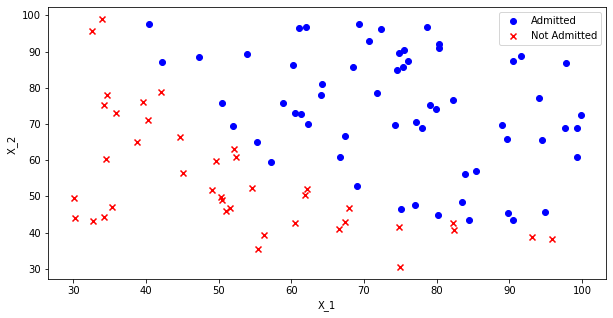

In [2]:
positive = data[data['label']==1]
negative = data[data['label']==0]
plt.figure(figsize=(10,5))#设置画布
plt.scatter(positive['X_1'], positive['X_2'], c='b', marker='o', 
            label='Admitted')#绘制散点图positive的点，Exam1和Exam2组成一个点
plt.scatter(negative['X_1'], negative['X_2'], c='r', marker='x',
            label='Not Admitted')#绘制散点图negative的点
plt.legend()# 添加图例（也就是图中右上角positive和negative的解释）
plt.xlabel('X_1')#添加x轴标签
plt.ylabel('X_2 ')#添加y轴标签
plt.show()


## 感知器

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
## 建立模型
per_clf = Perceptron(max_iter = 100, eta0 = 0.01)
## 训练模型
per_clf.fit(x_train, y_train)
## 预测标签
y_train_pred = per_clf.predict(x_train)
y_test_pred = per_clf.predict(x_test)
## 输出模型系数
print("感知器参数: ")
print('系数: %s \n\n截距: %s' % (per_clf.coef_, per_clf.intercept_))
print('================================')
## 准确率
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('训练集准确率: {:.2f}%'.format(train_acc * 100))
print('测试集准确率: {:.2f}%'.format(test_acc * 100))

感知器参数: 
系数: [[0.01696206 0.03500673]] 

截距: [0.01]
训练集准确率: 82.61%
测试集准确率: 90.00%


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## 支持向量机

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
## 建立模型
svm_clf = LinearSVC(C = 1.0, random_state = 100, max_iter = 500)
## 训练模型
svm_clf.fit(x_train, y_train)
## 预测标签
y_train_pred = svm_clf.predict(x_train)
y_test_pred = svm_clf.predict(x_test)
## 输出模型系数
print("SVM 参数: ")
print('系数: %s \n\n截距: %s' % (svm_clf.coef_, svm_clf.intercept_))
print('================================')
## 准确率
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('训练集准确率: {:.2f}%'.format(train_acc * 100))
print('测试集准确率: {:.2f}%'.format(test_acc * 100))

SVM 参数: 
系数: [[1.02887429 1.02895013]] 

截距: [0.60199901]
训练集准确率: 89.86%
测试集准确率: 93.33%


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## BP神经网络

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
## 建立模型
mlp_clf = MLPClassifier(hidden_layer_sizes = 3,
                        activation = 'relu',
                        random_state = 1)
## 训练模型
mlp_clf.fit(x_train, y_train)
## 预测标签
y_train_pred = mlp_clf.predict(x_train)
y_test_pred = mlp_clf.predict(x_test)
## 准确率
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('训练集准确率: {:.2f}%'.format(train_acc * 100))
print('测试集准确率: {:.2f}%'.format(test_acc * 100))

训练集准确率: 30.43%
测试集准确率: 46.67%


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 当隐藏层数较低（3层）时，效果比较糟糕，因此我们增加隐藏层的数量，继续训练。

In [16]:
mlp_clf = MLPClassifier(hidden_layer_sizes = 4,
                        activation = 'relu',
                        random_state = 1)
mlp_clf.fit(x_train, y_train)
y_train_pred = mlp_clf.predict(x_train)
y_test_pred = mlp_clf.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('训练集准确率: {:.2f}%'.format(train_acc * 100))
print('测试集准确率: {:.2f}%'.format(test_acc * 100))

训练集准确率: 88.41%
测试集准确率: 93.33%


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
mlp_clf = MLPClassifier(hidden_layer_sizes = 5,
                        activation = 'relu',
                        random_state = 1)
mlp_clf.fit(x_train, y_train)
y_train_pred = mlp_clf.predict(x_train)
y_test_pred = mlp_clf.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('训练集准确率: {:.2f}%'.format(train_acc * 100))
print('测试集准确率: {:.2f}%'.format(test_acc * 100))

训练集准确率: 92.75%
测试集准确率: 96.67%


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 针对该数据集利用三种不同模型进行训练得到的训练集准确率和测试集准确率如下：

||SVM|Perceptron|BP_netowrk|
|-----|-----|-----|-----|
|训练集准确率|82.61%|89.86%|92.75%|
|测试集准确率|90.00%|93.33%|96.67%|

## 从该表可以看出该数据利用隐藏层数为5层的BP神经网络所得到的结果最好。